## AI Programming with Python Nanodegree: Image Classifier Project
  - Do not make changes to the first 2 code cells, they are being used for setting up the `flowers` dataset and `cat_to_name.json`. Start writing code from third code cell onwards.
  - To use this notebook: `File > Save a copy in Drive`
  

### Code Explanation:

- **Setting Up Flower Dataset:**
  - `data_dir = './flowers'`: Defines the directory path for the flower dataset.
  - `FLOWERS_DIR = Path(data_dir)`: Uses `Path` from `pathlib` for handling PosixPath.

- **Downloading and Extracting Dataset:**
  - `if not FLOWERS_DIR.is_dir()`: Checks if the dataset directory exists.
    - `FLOWERS_DIR.mkdir(parents=True, exist_ok=True)`: Creates the directory if not present.
  - `TARBALL = FLOWERS_DIR / "flower_data.tar.gz"`: Defines the tarball path.
  - Downloads and extracts the dataset if not already present:
    - `request = requests.get(...)`: Downloads the 'flower_data.tar.gz' file.
    - `with open(TARBALL, "wb") as file_ref`: Writes the downloaded content to the tarball.
    - `with tarfile.open(TARBALL, "r") as tar_ref`: Extracts the tarball contents to the dataset directory.

- **Cleaning Up:**
  - `os.remove(TARBALL)`: Deletes the downloaded tarball to save space.

- **Status Messages:**
  - Prints informative messages about the directory creation, download, extraction, and cleanup.


In [1]:
# imports
import os
import requests
from pathlib import Path
import tarfile

# defining dataset directory
data_dir = './flowers'

# using pathlib.Path for handling PosixPath
FLOWERS_DIR = Path(data_dir)

# downloading and setting up data if not already present
if not FLOWERS_DIR.is_dir():
    # creating directory
    FLOWERS_DIR.mkdir(parents=True, exist_ok=True)
    print(f"[INFO] Directory created: ./{FLOWERS_DIR}")

    print() # for readability

    # tarball path
    TARBALL = FLOWERS_DIR / "flower_data.tar.gz"

    # downloading and writing the tarball to './flowers' directory
    print(f"[INFO] Downloading the file 'flower_data.tar.gz' to ./{FLOWERS_DIR}")
    request = requests.get('https://s3.amazonaws.com/content.udacity-data.com/nd089/flower_data.tar.gz')
    with open(TARBALL, "wb") as file_ref:
        file_ref.write(request.content)
        print(f"[INFO] 'flower_data.tar.gz' saved to ./{FLOWERS_DIR}")

    print() # for readability

    # extracting the downloaded tarball
    print(f"[INFO] Extracting the downloaded tarball to ./{FLOWERS_DIR}")
    with tarfile.open(TARBALL, "r") as tar_ref:
        tar_ref.extractall(FLOWERS_DIR)
        print(f"[INFO] 'flower_data.tar.gz' extracted successfully to ./{FLOWERS_DIR}")

    print() # for readability

    # using os.remove to delete the downloaded tarball
    print("[INFO] Deleting the tarball to save space.")
    os.remove(TARBALL)
else:
    print(f"[INFO] Dataset already setup at ./{FLOWERS_DIR}")

[INFO] Directory created: ./flowers

[INFO] Downloading the file 'flower_data.tar.gz' to ./flowers
[INFO] 'flower_data.tar.gz' saved to ./flowers

[INFO] Extracting the downloaded tarball to ./flowers
[INFO] 'flower_data.tar.gz' extracted successfully to ./flowers

[INFO] Deleting the tarball to save space.


### Code Explanation:

- **Creating a JSON File for Flower Categories:**
  - `data`: Defines a dictionary containing numerical keys and corresponding flower names.
  - `with open('cat_to_name.json', 'w') as file`: Opens the file 'cat_to_name.json' for writing.
  - `json.dump(data, file)`: Writes the dictionary data to the JSON file.

- **Interpreting the Output:**
  - The code creates a JSON file named 'cat_to_name.json' that serves as a mapping between numerical keys and flower names. This mapping can be useful for associating numerical labels with human-readable names in machine learning tasks.


In [2]:
import json

data = {
    "21": "fire lily", "3": "canterbury bells", "45": "bolero deep blue", "1": "pink primrose", "34": "mexican aster",
    "27": "prince of wales feathers", "7": "moon orchid", "16": "globe-flower", "25": "grape hyacinth", "26": "corn poppy",
    "79": "toad lily", "39": "siam tulip", "24": "red ginger", "67": "spring crocus", "35": "alpine sea holly",
    "32": "garden phlox", "10": "globe thistle", "6": "tiger lily", "93": "ball moss", "33": "love in the mist",
    "9": "monkshood", "102": "blackberry lily", "14": "spear thistle", "19": "balloon flower", "100": "blanket flower",
    "13": "king protea", "49": "oxeye daisy", "15": "yellow iris", "61": "cautleya spicata", "31": "carnation",
    "64": "silverbush", "68": "bearded iris", "63": "black-eyed susan", "69": "windflower", "62": "japanese anemone",
    "20": "giant white arum lily", "38": "great masterwort", "4": "sweet pea", "86": "tree mallow",
    "101": "trumpet creeper", "42": "daffodil", "22": "pincushion flower", "2": "hard-leaved pocket orchid",
    "54": "sunflower", "66": "osteospermum", "70": "tree poppy", "85": "desert-rose", "99": "bromelia", "87": "magnolia",
    "5": "english marigold", "92": "bee balm", "28": "stemless gentian", "97": "mallow", "57": "gaura",
    "40": "lenten rose", "47": "marigold", "59": "orange dahlia", "48": "buttercup", "55": "pelargonium",
    "36": "ruby-lipped cattleya", "91": "hippeastrum", "29": "artichoke", "71": "gazania", "90": "canna lily",
    "18": "peruvian lily", "98": "mexican petunia", "8": "bird of paradise", "30": "sweet william",
    "17": "purple coneflower", "52": "wild pansy", "84": "columbine", "12": "colt's foot", "11": "snapdragon",
    "96": "camellia", "23": "fritillary", "50": "common dandelion", "44": "poinsettia", "53": "primula",
    "72": "azalea", "65": "californian poppy", "80": "anthurium", "76": "morning glory", "37": "cape flower",
    "56": "bishop of llandaff", "60": "pink-yellow dahlia", "82": "clematis", "58": "geranium", "75": "thorn apple",
    "41": "barbeton daisy", "95": "bougainvillea", "43": "sword lily", "83": "hibiscus", "78": "lotus lotus",
    "88": "cyclamen", "94": "foxglove", "81": "frangipani", "74": "rose", "89": "watercress", "73": "water lily",
    "46": "wallflower", "77": "passion flower", "51": "petunia"
}

with open('cat_to_name.json', 'w') as file:
    json.dump(data, file)

In [3]:
# Check torch version and CUDA status if GPU is enabled.
import torch
print(torch.__version__)
print(torch.cuda.is_available()) # Should return True when GPU is enabled.


2.5.1+cu124
True


# Developing an AI application

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, you might want to include an image classifier in a smart phone app. To do this, you'd use a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. A large part of software development in the future will be using these types of models as common parts of applications.

In this project, you'll train an image classifier to recognize different species of flowers. You can imagine using something like this in a phone app that tells you the name of the flower your camera is looking at. In practice you'd train this classifier, then export it for use in your application. We'll be using [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) of 102 flower categories, you can see a few examples below.

<img src='assets/Flowers.png' width=500px>

The project is broken down into multiple steps:

* Load and preprocess the image dataset
* Train the image classifier on your dataset
* Use the trained classifier to predict image content

We'll lead you through each part which you'll implement in Python.

When you've completed this project, you'll have an application that can be trained on any set of labeled images. Here your network will be learning about flowers and end up as a command line application. But, what you do with your new skills depends on your imagination and effort in building a dataset. For example, imagine an app where you take a picture of a car, it tells you what the make and model is, then looks up information about it. Go build your own dataset and make something new.

First up is importing the packages you'll need. It's good practice to keep all the imports at the beginning of your code. As you work through this notebook and find you need to import a package, make sure to add the import up here.

In [4]:
# Imports here
# Core Libraries
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch import optim
from torch import tensor
import torch.nn.functional as F  # Activation functions
from torchvision import datasets  # Datasets, preprocessing
from torchvision import transforms
import torchvision.models as models
from PIL import Image  # Image handling
import seaborn as sns  # Visualization (optional)
import torch
from torchvision import datasets, transforms
# CLI Argument Handling
import argparse

# Utility Imports
import json  # If saving/loading class labels
import time  # If measuring execution time
from collections import OrderedDict  # If defining an ordered model structure

Load the data
Here you'll use torchvision to load the data (documentation). The data should be included alongside this notebook, otherwise you can download it here.

If you do not find the flowers/ dataset in the current directory, /workspace/home/aipnd-project/, you can download it using the following commands.

Method 1

!wget 'https://s3.amazonaws.com/content.udacity-data.com/nd089/flower_data.tar.gz'
!unlink flowers
!mkdir flowers && tar -xzf flower_data.tar.gz -C flowers
Method 2

!cp -r /data/ .

Data Description
The dataset is split into three parts, training, validation, and testing. For the training, you'll want to apply transformations such as random scaling, cropping, and flipping. This will help the network generalize leading to better performance. You'll also need to make sure the input data is resized to 224x224 pixels as required by the pre-trained networks.

The validation and testing sets are used to measure the model's performance on data it hasn't seen yet. For this you don't want any scaling or rotation transformations, but you'll need to resize then crop the images to the appropriate size.

The pre-trained networks you'll use were trained on the ImageNet dataset where each color channel was normalized separately. For all three sets you'll need to normalize the means and standard deviations of the images to what the network expects. For the means, it's [0.485, 0.456, 0.406] and for the standard deviations [0.229, 0.224, 0.225], calculated from the ImageNet images. These values will shift each color channel to be centered at 0 and range from -1 to 1.

In [5]:
data_dir = 'flowers'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir + '/test'

In [6]:
# TODO: Define your transforms for the training, validation, and testing sets
# =====================================
# DATA TRANSFORMATIONS
# =====================================

# Data transformations are used to preprocess images before feeding them into the neural network.
# This ensures that all images have the same dimensions and format.

# Transformations include:
# - Resizing and cropping to 224x224 pixels (required for pretrained models like ResNet, VGG, etc.).
# - Normalizing color channels using ImageNet dataset statistics (mean and std deviation).
# - Data augmentation (random resizing, flipping) to prevent overfitting.

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(size=224),  # Randomly crops and resizes to 224x224 pixels
        transforms.RandomHorizontalFlip(),  # Randomly flips images horizontally (data augmentation)
        transforms.ToTensor(),  # Converts images to tensors (PyTorch format)
        transforms.Normalize([0.485,0.456,0.406],  # Normalize with ImageNet mean
                             [0.229,0.224,0.225])  # Normalize with ImageNet standard deviation
    ]),

    'valid': transforms.Compose([
        transforms.Resize(size=256),  # Resize the image to 256 pixels on the shortest side
        transforms.CenterCrop(size=224),  # Crop the center to 224x224 pixels
        transforms.ToTensor(),  # Convert to tensor
        transforms.Normalize([0.485,0.456,0.406], [0.229,0.224,0.225])  # Normalize
    ]),

    'test': transforms.Compose([
        transforms.Resize(size=256),  # Resize the image to 256 pixels on the shortest side
        transforms.CenterCrop(size=224),  # Crop the center to 224x224 pixels
        transforms.ToTensor(),  # Convert to tensor
        transforms.Normalize([0.485,0.456,0.406], [0.229,0.224,0.225])  # Normalize
    ])
}


# TODO: Load the datasets with ImageFolder
# =====================================
# LOADING DATASETS
# =====================================

# The datasets are loaded using ImageFolder, which automatically assigns labels based on folder names.
# Example: If "flowers/train" has subfolders "roses", "daisies", "sunflowers", etc.,
# each subfolder will be assigned a class label.

image_datasets = {
    'train': datasets.ImageFolder(train_dir, transform=data_transforms['train']),  # Load training images
    'valid': datasets.ImageFolder(valid_dir, transform=data_transforms['valid']),  # Load validation images
    'test': datasets.ImageFolder(test_dir, transform=data_transforms['test'])  # Load test images
}


# TODO: Using the image datasets and the trainforms, define the dataloaders
# =====================================
# CREATING DATALOADERS
# =====================================

# DataLoaders help in efficiently loading and processing images in batches.
# - "batch_size=64" means 64 images are loaded at a time.
# - "shuffle=True" for training ensures images are randomly shuffled (prevents model from memorizing order).

train_loader = torch.utils.data.DataLoader(image_datasets['train'], batch_size=64, shuffle=True)
valid_loader = torch.utils.data.DataLoader(image_datasets['valid'], batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(image_datasets['test'], batch_size=64, shuffle=True)

# =====================================
# CHECKING DATASET SIZES
# =====================================

# Getting the number of batches in each dataset.
# Useful for tracking training progress and computing loss & accuracy.

train_Loader_size = len(train_loader)  # Number of training batches
valid_Loader_size = len(valid_loader)  # Number of validation batches
test_loader_size = len(test_loader)  # Number of test batches

# Print dataset sizes to verify the dataset is loaded correctly.
print("Training Set Size:", train_Loader_size)
print("Validation Set Size:", valid_Loader_size)
print("Test Set Size:", test_loader_size)

Training Set Size: 103
Validation Set Size: 13
Test Set Size: 13


Label mapping
You'll also need to load in a mapping from category label to category name. You can find this in the file cat_to_name.json. It's a JSON object which you can read in with the json module. This will give you a dictionary mapping the integer encoded categories to the actual names of the flowers.

In [7]:
import json

with open('cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)

Building and training the classifier
Now that the data is ready, it's time to build and train the classifier. As usual, you should use one of the pretrained models from torchvision.models to get the image features. Build and train a new feed-forward classifier using those features.

We're going to leave this part up to you. Refer to the rubric for guidance on successfully completing this section. Things you'll need to do:

Load a pre-trained network (If you need a starting point, the VGG networks work great and are straightforward to use)
Define a new, untrained feed-forward network as a classifier, using ReLU activations and dropout
Train the classifier layers using backpropagation using the pre-trained network to get the features
Track the loss and accuracy on the validation set to determine the best hyperparameters
We've left a cell open for you below, but use as many as you need. Our advice is to break the problem up into smaller parts you can run separately. Check that each part is doing what you expect, then move on to the next. You'll likely find that as you work through each part, you'll need to go back and modify your previous code. This is totally normal!

When training make sure you're updating only the weights of the feed-forward network. You should be able to get the validation accuracy above 70% if you build everything right. Make sure to try different hyperparameters (learning rate, units in the classifier, epochs, etc) to find the best model. Save those hyperparameters to use as default values in the next part of the project.

One last important tip if you're using the workspace to run your code: To avoid having your workspace disconnect during the long-running tasks in this notebook, please read in the earlier page in this lesson called Intro to GPU Workspaces about Keeping Your Session Active.

Note for Workspace users:
If your network is over 1 GB when saved as a checkpoint, there might be issues with saving backups in your workspace. Typically this happens with wide dense layers after the convolutional layers. If your saved checkpoint is larger than 1 GB (you can open a terminal and check with ls -lh), you should reduce the size of your hidden layers and train again.



In [8]:
# TODO: Build and train your network
# Load the pretrained VGG16 model
#Why Use VGG16?
#Pretrained on ImageNet: Learns general image features.
#Saves Time: We reuse learned features instead of training from scratch.
#Challenges: Large Model Size, Computationally Intensive
# VGG16 is a deep convolutional network trained on ImageNet with 16 layers.
# It is widely used in image classification due to its high accuracy.
# The model consists of two parts: Feature Extractor (Convolutional layers) and Classifier (Fully connected layers).
model = models.vgg16(pretrained=True)

# By default, all model parameters have 'requires_grad=True', meaning they will be updated during training.
# Since we are using the model for feature extraction, we do NOT want to change these pre-trained weights.
# Freezing the convolutional layers prevents unnecessary computation and speeds up training.
# This prevents the model from updating the pre-trained weights
for param in model.parameters():
    param.requires_grad = False  # This ensures that only our custom classifier will be trained

# VGG16 has a built-in classifier for ImageNet with 1000 output classes.
# We replace it with a custom classifier suited for our task (e.g., flower classification with 102 classes).

# The last layer of VGG16 takes an input of 25088 features, so we must match that for our first custom layer.
# The classifier consists of multiple fully connected (Linear) layers with ReLU activations and dropout for regularization.

#Used OrderedDict to preserve the order in which the keys are inserted
classifier = nn.Sequential(OrderedDict([
    ('input', nn.Linear(25088, 120)),  # First fully connected hidden layer: 25088 → 120 neurons
    ('relu1', nn.ReLU()),  # Activation function to introduce non-linearity
    ('dropout1', nn.Dropout(0.5)),  # Dropout layer to prevent overfitting #can use a different droupout probability

    ('hidden layer 1', nn.Linear(120, 90)),  # Second fully connected hidden layer: 120 → 90 neurons
    ('relu2', nn.ReLU()),

    ('hidden layer 2', nn.Linear(90, 70)),  # Third fully connected hidden layer: 90 → 70 neurons
    ('relu3', nn.ReLU()),

    ('hidden layer 3', nn.Linear(70, 102)),  # Output layer: 70 → 102 neurons (for 102 different flower categories)
    ('output', nn.LogSoftmax(dim=1))  # LogSoftmax ensures output probabilities sum to 1 for classification
]))
# Replace the VGG16 classifier with our custom one
model.classifier = classifier

# Move the model to GPU if available
# Using a GPU speeds up the training significantly
if torch.cuda.is_available():
    model.cuda()

# Define the loss function
# Since we are using LogSoftmax in our last layer, we use Negative Log Likelihood Loss (NLLLoss)
# NLLLoss is commonly used for classification tasks with multiple classes
criterion = nn.NLLLoss()

# Define the optimizer
# We use the Adam optimizer, which adjusts learning rates automatically for each parameter
# We only update the classifier's parameters, keeping the convolutional layers frozen
optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)  # Learning rate = 0.001

# Now the model is ready to be trained!


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:06<00:00, 85.4MB/s]


In [9]:

# Ensure GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f" Using device: {device}")

# Move model to GPU
model.to(device)

# Define number of epochs
epochs = 9


# Track training steps
steps = 0

# Training loop
for epoch in range(epochs):
    running_loss = 0  # Tracks total loss for the epoch

    # Set model to training mode
    model.train()

    # Loop through training data in batches
    for images, labels in train_loader:
        steps += 1  # Count training steps

        # Move images and labels to GPU
        images, labels = images.to(device), labels.to(device)

        # Clear gradients from the previous step
        optimizer.zero_grad()
        # Print loss every few steps
        print_every = 40

        # Forward pass
        logps = model(images)
        loss = criterion(logps, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

        # Add loss to the running total
        running_loss += loss.item()

        # Print training loss every few steps
        if steps % print_every == 0:
            model.eval()  # Set model to evaluation mode (turns off dropout)
            validation_loss = 0
            accuracy = 0

            # Turn off gradients during validation
            with torch.no_grad():
                for images, labels in valid_loader:
                    images, labels = images.to(device), labels.to(device)

                    # Forward pass on validation data
                    logps = model(images)
                    batch_loss = criterion(logps, labels)
                    validation_loss += batch_loss.item()

                    # Calculate accuracy
                    ps = torch.exp(logps)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

            # Print loss & accuracy stats
            print(f"Epoch {epoch+1}/{epochs}.. "
                  f"Train Loss: {running_loss/print_every:.3f}.. "
                  f"Validation Loss: {validation_loss/len(valid_loader):.3f}.. "
                  f"Validation Accuracy: {accuracy/len(valid_loader):.3f}")

            running_loss = 0  # Reset training loss tracker
            model.train()  # Set model back to training mode

print(" Training Complete! Model trained on GPU. ")

 Using device: cuda
Epoch 1/9.. Train Loss: 4.476.. Validation Loss: 4.100.. Validation Accuracy: 0.120
Epoch 1/9.. Train Loss: 3.944.. Validation Loss: 3.100.. Validation Accuracy: 0.262
Epoch 2/9.. Train Loss: 1.312.. Validation Loss: 2.374.. Validation Accuracy: 0.400
Epoch 2/9.. Train Loss: 2.843.. Validation Loss: 1.978.. Validation Accuracy: 0.471
Epoch 2/9.. Train Loss: 2.547.. Validation Loss: 1.754.. Validation Accuracy: 0.533
Epoch 3/9.. Train Loss: 2.009.. Validation Loss: 1.495.. Validation Accuracy: 0.591
Epoch 3/9.. Train Loss: 2.327.. Validation Loss: 1.400.. Validation Accuracy: 0.632
Epoch 4/9.. Train Loss: 0.577.. Validation Loss: 1.379.. Validation Accuracy: 0.614
Epoch 4/9.. Train Loss: 2.033.. Validation Loss: 1.251.. Validation Accuracy: 0.676
Epoch 4/9.. Train Loss: 2.069.. Validation Loss: 1.158.. Validation Accuracy: 0.656
Epoch 5/9.. Train Loss: 1.381.. Validation Loss: 1.035.. Validation Accuracy: 0.719
Epoch 5/9.. Train Loss: 1.879.. Validation Loss: 1.075..

In [10]:
# Set model to evaluation mode (disables dropout, batch norm, etc.)
model.eval()

test_loss = 0
accuracy = 0

# Disable gradient calculation (reduces memory usage & speeds up inference)
with torch.no_grad():
    for images, labels in test_loader:  # Use test_loader if available
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        logps = model(images)
        test_loss += criterion(logps, labels).item()

        # Calculate accuracy
        ps = torch.exp(logps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

# Print final accuracy
print(f"Test Loss: {test_loss/len(test_loader):.4f}")
print(f"Test Accuracy: {accuracy/len(test_loader) * 100:.2f}%")


Test Loss: 0.8516
Test Accuracy: 76.82%


In [11]:
# Perform validation without gradient tracking to save memory and speed up computations
with torch.no_grad():

    # Set model to evaluation mode (important to disable dropout layers)
    model.eval()

    # Initialize validation loss and accuracy counters
    valid_loss = 0
    valid_acc = 0

    # Loop through validation/test dataset
    for i, (inputs, labels) in enumerate(valid_loader):

        # Move inputs and labels to GPU if available, else use CPU
        inputs, labels = inputs.to('cuda'), labels.to('cuda')

        # Forward pass - get model predictions
        outputs = model(inputs)

        # Compute loss for this batch
        loss = criterion(outputs, labels)

        # Accumulate total validation loss
        valid_loss += loss.item() * inputs.size(0)

        # Get predicted class with the highest probability
        _, predictions = torch.max(outputs, 1)

        # Compare predictions with actual labels
        correct_counts = predictions.eq(labels.view_as(predictions))

        # Convert correct predictions to float and compute batch accuracy
        batch_accuracy = torch.mean(correct_counts.type(torch.FloatTensor))

        # Accumulate total validation accuracy
        valid_acc += batch_accuracy.item() * inputs.size(0)

        # Print batch-wise validation results
        print(f"Validation Batch: {i+1:03d}, "
              f"Loss: {loss.item():.4f}, "
              f"Accuracy: {batch_accuracy.item():.4f}")

# Compute overall validation loss and accuracy
final_valid_loss = valid_loss / len(valid_loader.dataset)
final_valid_acc = valid_acc / len(valid_loader.dataset)

# Print final validation results
print(f"\nFinal Validation Loss: {final_valid_loss:.4f}")
print(f"Final Validation Accuracy: {final_valid_acc*100:.2f}%")


Validation Batch: 001, Loss: 0.7224, Accuracy: 0.7969
Validation Batch: 002, Loss: 0.7140, Accuracy: 0.8594
Validation Batch: 003, Loss: 0.7749, Accuracy: 0.7656
Validation Batch: 004, Loss: 1.0124, Accuracy: 0.7812
Validation Batch: 005, Loss: 0.8375, Accuracy: 0.7500
Validation Batch: 006, Loss: 0.8853, Accuracy: 0.7188
Validation Batch: 007, Loss: 0.7383, Accuracy: 0.7969
Validation Batch: 008, Loss: 0.8492, Accuracy: 0.7656
Validation Batch: 009, Loss: 0.7967, Accuracy: 0.8750
Validation Batch: 010, Loss: 0.7145, Accuracy: 0.7812
Validation Batch: 011, Loss: 0.5888, Accuracy: 0.8438
Validation Batch: 012, Loss: 0.6937, Accuracy: 0.8125
Validation Batch: 013, Loss: 0.7877, Accuracy: 0.7600

Final Validation Loss: 0.7779
Final Validation Accuracy: 79.34%


Testing your network
It's good practice to test your trained network on test data, images the network has never seen either in training or validation. This will give you a good estimate for the model's performance on completely new images. Run the test images through the network and measure the accuracy, the same way you did validation. You should be able to reach around 70% accuracy on the test set if the model has been trained well.

In [12]:
# TODO: Do validation on the test set
with torch.no_grad():
    model.eval()  # Set the model to evaluation mode

    correct = 0  # Counter for correct predictions
    total = 0    # Counter for total predictions

    # Loop through test dataset (train_loader should be test_loader here)
    for images, labels in test_loader:  # Make sure you're using the correct test dataset
        # Move images and labels to GPU if available
        images, labels = images.to('cuda'), labels.to('cuda')

        # Forward pass - get predictions
        outputs = model(images)

        # Get the class with the highest probability
        _, predicted = torch.max(outputs.data, 1)

        # Update total number of labels
        total += labels.size(0)

        # Count correct predictions
        correct += (predicted == labels).sum().item()

# Calculate and print accuracy
accuracy = 100 * correct / total
print(f'Accuracy on test images: {accuracy:.2f}%')


Accuracy on test images: 77.05%


Save the checkpoint
Now that your network is trained, save the model so you can load it later for making predictions. You probably want to save other things such as the mapping of classes to indices which you get from one of the image datasets: image_datasets['train'].class_to_idx. You can attach this to the model as an attribute which makes inference easier later on.

model.class_to_idx = image_datasets['train'].class_to_idx

Remember that you'll want to completely rebuild the model later so you can use it for inference. Make sure to include any information you need in the checkpoint. If you want to load the model and keep training, you'll want to save the number of epochs as well as the optimizer state, optimizer.state_dict. You'll likely want to use this trained model in the next part of the project, so best to save it now.

In [13]:
# TODO: Save the checkpoint
# Attach class-to-index mapping to the model
model.class_to_idx = image_datasets['train'].class_to_idx

# Create a dictionary to store all necessary information for reloading the model
checkpoint = {
    'architecture': 'vgg16',  # Model type (useful for reconstruction)
    'hidden_layer1': 120,       # Number of neurons in the first hidden layer
    'dropout': 0.5,             # Dropout rate to prevent overfitting
    'epochs': 9,               # Number of training epochs
    'state_dict': model.state_dict(),  # Model's trained weights
    'class_to_idx': model.class_to_idx,  # Mapping of class names to indices
    'optimizer_state': optimizer.state_dict()  # Optimizer state for resuming training
}

# Save the checkpoint to a file
torch.save(checkpoint, 'checkpoint.pth')

print("✅ Model checkpoint saved successfully as 'checkpoint.pth'!")


✅ Model checkpoint saved successfully as 'checkpoint.pth'!


Loading the checkpoint
At this point it's good to write a function that can load a checkpoint and rebuild the model. That way you can come back to this project and keep working on it without having to retrain the network.

In [14]:
# TODO: Write a function that loads a checkpoint and rebuilds the model
def load_checkpoint(path='checkpoint.pth'):
    """
    Load a saved model checkpoint and rebuild the model.
    """
    # Load the saved checkpoint
    checkpoint = torch.load('checkpoint.pth')

    # Rebuild the model using the saved architecture
    model = models.vgg16(pretrained=True)  # Load pre-trained vgg16
    # Freeze feature extractor layers (prevents further training)
    for param in model.parameters():
        param.requires_grad = False
    # Build the classifier based on the saved parameters
    classifier = nn.Sequential(OrderedDict([
        ('input', nn.Linear(25088, checkpoint['hidden_layer1'])),
        ('relu1', nn.ReLU()),
        ('dropout1', nn.Dropout(checkpoint['dropout'])),
        ('hidden layer 1', nn.Linear(checkpoint['hidden_layer1'], 90)),  # Adjust input size if needed
        ('relu2', nn.ReLU()),
        ('hidden layer 2', nn.Linear(90, 70)),
        ('relu3', nn.ReLU()),
        ('hidden layer 3', nn.Linear(70, 102)),
        ('output', nn.LogSoftmax(dim=1))
    ]))

    # Replace the default classifier with the rebuilt one
    model.classifier = classifier

    # Load the saved class-to-index mapping
    model.class_to_idx = checkpoint['class_to_idx']

    # Load the saved model state dictionary
    model.load_state_dict(checkpoint['state_dict'])

    print("✅ Model successfully loaded from", path)

    return model



Inference for classification
Now you'll write a function to use a trained network for inference. That is, you'll pass an image into the network and predict the class of the flower in the image. Write a function called predict that takes an image and a model, then returns the top  𝐾
  most likely classes along with the probabilities. It should look like

probs, classes = predict(image_path, model)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
First you'll need to handle processing the input image such that it can be used in your network.

Image Preprocessing
You'll want to use PIL to load the image (documentation). It's best to write a function that preprocesses the image so it can be used as input for the model. This function should process the images in the same manner used for training.

First, resize the images where the shortest side is 256 pixels, keeping the aspect ratio. This can be done with the thumbnail or resize methods. Then you'll need to crop out the center 224x224 portion of the image.

Color channels of images are typically encoded as integers 0-255, but the model expected floats 0-1. You'll need to convert the values. It's easiest with a Numpy array, which you can get from a PIL image like so np_image = np.array(pil_image).

As before, the network expects the images to be normalized in a specific way. For the means, it's [0.485, 0.456, 0.406] and for the standard deviations [0.229, 0.224, 0.225]. You'll want to subtract the means from each color channel, then divide by the standard deviation.

And finally, PyTorch expects the color channel to be the first dimension but it's the third dimension in the PIL image and Numpy array. You can reorder dimensions using ndarray.transpose. The color channel needs to be first and retain the order of the other two dimensions.

In [15]:
def process_image(image_path):
    """
    Process an image for use in a PyTorch model.

    Steps:
    1. Resize image to ensure the shorter side is 256 pixels (aspect ratio maintained).
    2. Crop the center 224x224 portion.
    3. Normalize image using ImageNet's mean & standard deviation.
    4. Convert to PyTorch-compatible format.

    Args:
        image_path (str): Path to the image file.

    Returns:
        np.ndarray: Processed image as a NumPy array (3, 224, 224).
    """

    # Open the image
    img = Image.open(image_path)

    # Step 1: Resize - Maintain aspect ratio, shortest side = 256
    img.thumbnail((256, 256))  # Automatically scales keeping aspect ratio

    # Step 2: Center Crop - Extract a 224x224 portion
    width, height = img.size
    left = (width - 224) / 2
    top = (height - 224) / 2
    right = left + 224
    bottom = top + 224
    img = img.crop((left, top, right, bottom))

    # Step 3: Convert to NumPy array & Scale pixel values to [0,1]
    np_image = np.array(img) / 255.0

    # Step 4: Normalize using ImageNet Mean & Standard Deviation
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    np_image = (np_image - mean) / std  # Element-wise normalization

    # Step 5: Reorder dimensions to (Channels, Height, Width)
    np_image = np_image.transpose((2, 0, 1))  # PyTorch expects (C, H, W)

    return np_image

To check your work, the function below converts a PyTorch tensor and displays it in the notebook. If your process_image function works, running the output through this function should return the original image (except for the cropped out portions).

<Axes: >

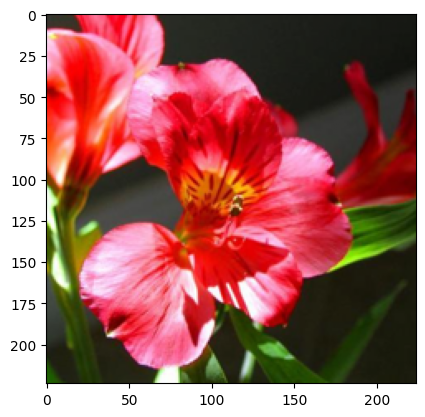

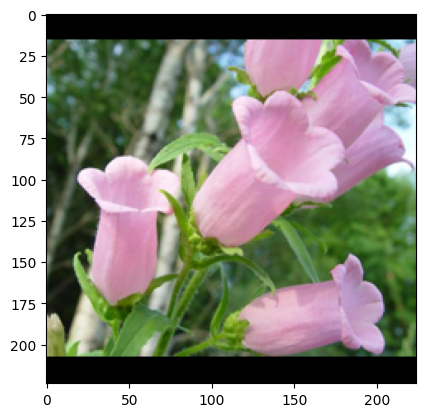

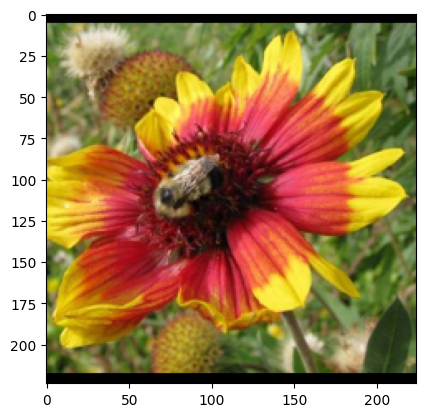

In [25]:
def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()

    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.transpose((1, 2, 0))

    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean

    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)

    ax.imshow(image)

    return ax
imshow(process_image("flowers/test/18/image_04254.jpg"))
imshow(process_image("flowers/test/3/image_06634.jpg"))
imshow(process_image("flowers/test/100/image_07896.jpg"))


Class Prediction
Once you can get images in the correct format, it's time to write a function for making predictions with your model. A common practice is to predict the top 5 or so (usually called top- 𝐾
 ) most probable classes. You'll want to calculate the class probabilities then find the  𝐾
  largest values.

To get the top  𝐾
  largest values in a tensor use x.topk(k). This method returns both the highest k probabilities and the indices of those probabilities corresponding to the classes. You need to convert from these indices to the actual class labels using class_to_idx which hopefully you added to the model or from an ImageFolder you used to load the data (see here). Make sure to invert the dictionary so you get a mapping from index to class as well.

Again, this method should take a path to an image and a model checkpoint, then return the probabilities and classes.

probs, classes = predict(image_path, model)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']

In [17]:
def predict(image_path, model, top_k=5):
    ''' Predict the class (or classes) of an image using a trained deep learning model.

    image_path: string. Path to image, directly to image and not to folder.
    model: pytorch neural network.
    top_k: integer. The top K classes to be calculated

    returns top_probabilities(k), top_labels
    '''

    # No need for GPU on this part (just causes problems)
    model.to("cpu")

    # Set model to evaluate
    model.eval();

    # Convert image from numpy to torch
    torch_image = torch.from_numpy(np.expand_dims(process_image(image_path),
                                                  axis=0)).type(torch.FloatTensor).to("cpu")

    # Find probabilities (results) by passing through the function (note the log softmax means that its on a log scale)
    log_probs = model.forward(torch_image)

    # Convert to linear scale
    linear_probs = torch.exp(log_probs)

    # Find the top 5 results
    top_probs, top_labels = linear_probs.topk(top_k)

    # Detatch all of the details
    top_probs = np.array(top_probs.detach())[0] # This is not the correct way to do it but the correct way isnt working thanks to cpu/gpu issues so I don't care.
    top_labels = np.array(top_labels.detach())[0]

    # Convert to classes
    idx_to_class = {val: key for key, val in
                                      model.class_to_idx.items()}
    top_labels = [idx_to_class[lab] for lab in top_labels]
    top_flowers = [cat_to_name[lab] for lab in top_labels]

    return top_probs, top_labels, top_flowers

Sanity Checking
Now that you can use a trained model for predictions, check to make sure it makes sense. Even if the testing accuracy is high, it's always good to check that there aren't obvious bugs. Use matplotlib to plot the probabilities for the top 5 classes as a bar graph, along with the input image. It should look like this:


You can convert from the class integer encoding to actual flower names with the cat_to_name.json file (should have been loaded earlier in the notebook). To show a PyTorch tensor as an image, use the imshow function defined above.

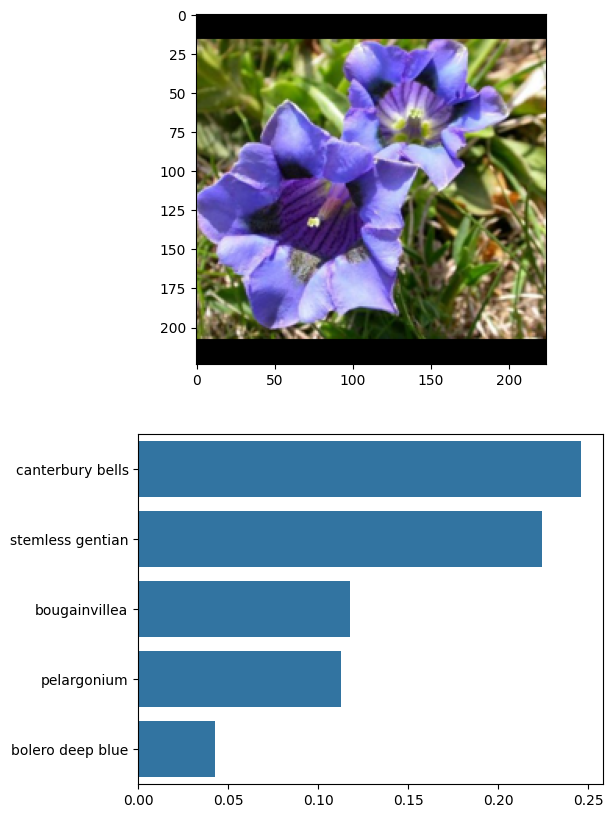

In [23]:
# TODO: Display an image along with the top 5 classes
# Define image path
image_path = "flowers/test/28/image_05230.jpg"

# Set up plot
plt.figure(figsize = (6,10))
ax = plt.subplot(2,1,1)

# Set up title
flower_num = image_path.split('/')[2]
title_ = cat_to_name[flower_num]

# Plot flower
img = process_image(image_path)
imshow(img, ax, title = title_);

# Make prediction
probs, labs, flowers = predict(image_path, model)


# Plot bar chart
plt.subplot(2,1,2)
sns.barplot(x=probs, y=flowers, color=sns.color_palette()[0]);

plt.show()


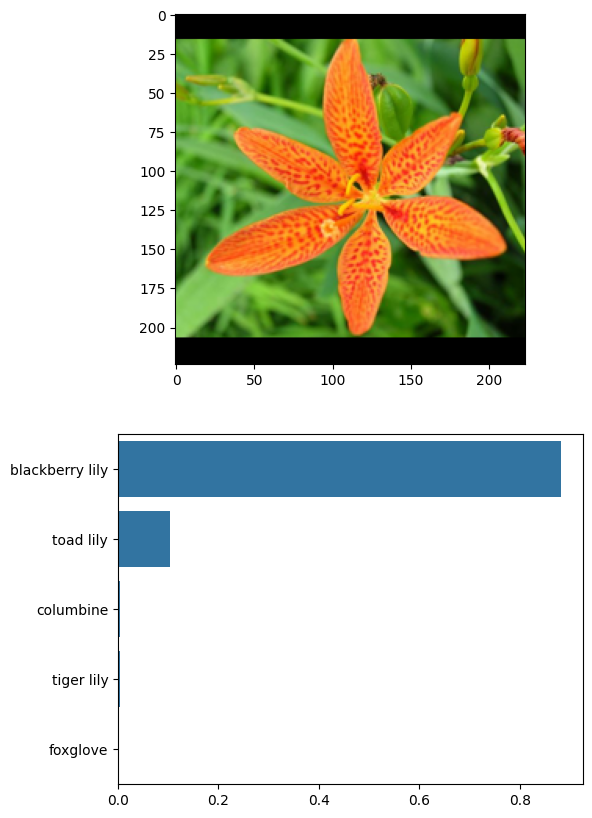

In [24]:
image_path = "flowers/test/102/image_08004.jpg"
plt.figure(figsize = (6,10))
ax = plt.subplot(2,1,1)
flower_num = image_path.split('/')[2]
title_ = cat_to_name[int(flower_num)] if int(flower_num) in cat_to_name else "Unknown Flower" # Handle cases where flower_num might not be in cat_to_name
img = process_image(image_path)
imshow(img, ax, title = title_);
probs, labs, flowers = predict(image_path, model)
plt.subplot(2,1,2)
sns.barplot(x=probs, y=flowers, color=sns.color_palette()[0]);
plt.show()